## 1 简单示例：批量梯度下降（每次更新参数要使用全部样本）

Predict (before training) 4 4.0
Epoch: 0 w= 1.195 loss= 9.75
Epoch: 5 w= 1.7278707139849843 loss= 1.1142006805195201
Epoch: 10 w= 1.9080070207365936 loss= 0.1273275032277088
Epoch: 15 w= 1.9689018835213106 loss= 0.01455060417899115
Epoch: 20 w= 1.9894873189642763 loss= 0.0016627992900720505
Epoch: 25 w= 1.9964462007647763 loss= 0.0001900197026221195
Epoch: 30 w= 1.9987986424241961 loss= 2.1714880202434718e-05
Epoch: 35 w= 1.9995938825101214 loss= 2.481511210151131e-06
Epoch: 40 w= 1.9998627124688708 loss= 2.8357963887877504e-07
Epoch: 45 w= 1.9999535901145031 loss= 3.2406628371320974e-08
Predict (after training) 4 7.999922043198923


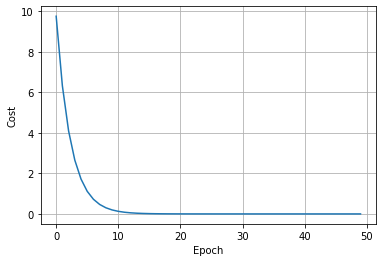

In [1]:
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0, 5.0]
y_data = [2.0, 4.0, 6.0, 10.0]

w = 1.0


def forward(x):
    return x * w


# 定义损失函数
def cost(xs, ys):
    cost = 0
    for x, y in zip(xs, ys):
        y_pred = forward(x)
        cost += (y_pred - y) ** 2
    return cost / len(xs)


# 求解梯度
def gradient(xs, ys):
    grad = 0
    for x, y in zip(xs, ys):
        grad += 2 * x * (w * x - y)
    return grad / len(xs)


cost_list = []
print('Predict (before training)', 4, forward(4))
for epoch in range(50):
    cost_val = cost(x_data, y_data)
    cost_list.append(cost_val)
    grad_val = gradient(x_data, y_data)
    w -= 0.01 * grad_val  # 学习率为0.01
    if epoch % 5 == 0:
        print('Epoch:', epoch, 'w=', w, 'loss=', cost_val)
print('Predict (after training)', 4, forward(4))
plt.plot(cost_list)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.grid()
plt.show()

## 2 随机梯度下降（每次更新时只使用一个样本）

Predict (before training) 4 4.0
epoch: 0 w= 1.18 loss= 9.0
epoch: 5 w= 1.5426556823039999 loss= 0.9884868852968803
epoch: 10 w= 1.695150879788454 loss= 1.24389779126083
epoch: 15 w= 1.7835463803035303 loss= 0.6271111322387505
epoch: 20 w= 1.8792758133988885 loss= 0.195075792793724
epoch: 25 w= 1.932667657621354 loss= 0.004720579269257838
epoch: 30 w= 1.955118704788289 loss= 0.00951952107694123
epoch: 35 w= 1.9700837578387946 loss= 0.0009318841576924996
epoch: 40 w= 1.9810672817525319 loss= 0.00037322763456685545
epoch: 45 w= 1.991164519276511 loss= 0.00036893062199973265
Predict (after training) 4 7.9820725070851815


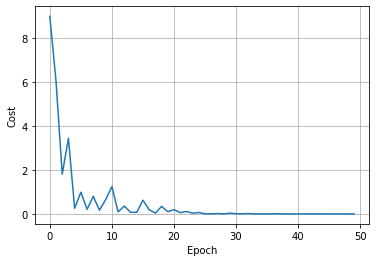

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x_data = [1.0, 2.0, 3.0, 5.0]
y_data = [2.0, 4.0, 6.0, 10.0]

w = 1.0


def forward(x):
    return x * w


# 定义损失函数
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2


# 求解梯度
def gradient(x, y):
    return 2 * x * (w * x - y)


cost_list = []
print('Predict (before training)', 4, forward(4))
for epoch in range(50):
    r = np.random.randint(0, 3)
    x = x_data[r]
    y = y_data[r]
    l = loss(x, y)
    cost_list.append(l)
    grad = gradient(x, y)
    w -= 0.01 * grad
    if epoch % 5 == 0:
        print('epoch:', epoch, 'w=', w, 'loss=', l)
print('Predict (after training)', 4, forward(4))
plt.plot(cost_list)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.grid()
plt.show()

## 3 mini-batch梯度下降(每次使用m个样本。在深度学习中，比较常用)

Predict (before training) 4 4.0
Epoch: 0 w= 1.05 loss= 2.5
Epoch: 5 w= 1.753508117 loss= 2.3711896752595427
Epoch: 10 w= 1.9079420479016884 loss= 0.023475530594279842
Epoch: 15 w= 1.9761141705706984 loss= 0.022265974306558252
Epoch: 20 w= 1.9910792983741736 loss= 0.00022044021467318388
Epoch: 25 w= 1.9976853889037567 loss= 0.00020908222441802307
Epoch: 30 w= 1.9991355562916278 loss= 2.0699804015078535e-06
Epoch: 35 w= 1.999775706992185 loss= 1.963326462418633e-06
Epoch: 40 w= 1.9999162327184241 loss= 1.9437555298078516e-08
Epoch: 45 w= 1.9999782653105584 loss= 1.8436052173972495e-08
Predict (after training) 4 7.999965821853098


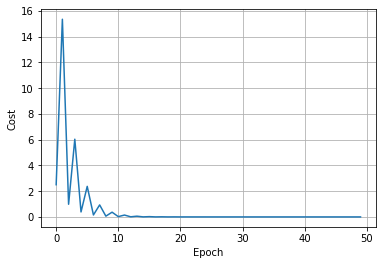

In [3]:
# 这里每次更新w时使用2个样本
import matplotlib.pyplot as plt

x_data = [1.0, 2.0, 3.0, 5.0]
y_data = [2.0, 4.0, 6.0, 10.0]

w = 1.0


def forward(x):
    return x * w


# 定义损失函数
def cost(xs, ys):
    cost = 0
    for x, y in zip(xs, ys):
        y_pred = forward(x)
        cost += (y_pred - y) ** 2
    return cost / 2


# 求解梯度
def gradient(xs, ys):
    grad = 0
    for x, y in zip(xs, ys):
        grad += 2 * x * (w * x - y)
    return grad / 2


i = 1
cost_list = []
print('Predict (before training)', 4, forward(4))
for epoch in range(50):
    if i % 2 == 1:
        x = x_data[:2]
        y = y_data[:2]
    else:
        x = x_data[2:]
        y = y_data[2:]
    i += 1
    cost_val = cost(x, y)
    cost_list.append(cost_val)
    grad_val = gradient(x, y)
    w -= 0.01 * grad_val  # 学习率为0.01
    if epoch % 5 == 0:
        print('Epoch:', epoch, 'w=', w, 'loss=', cost_val)
print('Predict (after training)', 4, forward(4))
plt.plot(cost_list)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.grid()
plt.show()